## Сверточные слои и особенности их строения

На нашем нейросетевом пути мы очень часто будем использовать сверточные слои. Чтобы при построении моделей правильно вычислять размеры входных и выходных тензоров, а следовательно и правильно определять значения аргументов, необходимо понимать как работает сверточный слой.

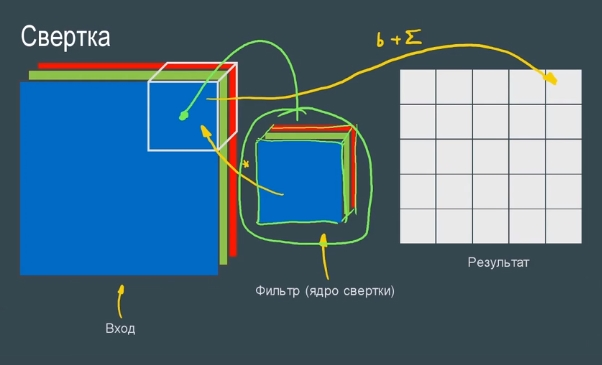

На уже знакомом нам neurohive есть потрясающая статья про свертки: https://neurohive.io/ru/osnovy-data-science/glubokaya-svertochnaja-nejronnaja-set/

Там можно почитать про то как свертки работают в случае нескольких каналов: как объединяются, суммируются и в целом сосуществуют.

Чтобы вникнуть в суть сверточного слоя предлагаю реализовать несколько методов, непосредственно связанных с ними.

In [ ]:
!pip install torch
import torch

Вспомним как работает сверточный слой:

1. на вход подается массив изображений (он же батч)

2. к каждому изображению по границам добавляются нули

3. по каждому изображению "скользит" каждый из фильтров сверточного слоя

Давайте начнем с разминки - реализуем функцию, добавляющую padding.

Пусть у нас есть батч input_images из двух изображений с тремя каналами (RGB). Размер изображений пусть будет 3*3. Вспомним, что вход сверточного слоя имеет следующую размерность:

размер батча
x
число каналов
x
высота
x
ширина

В рассматриваемом случае размерность входа (2, 3, 3, 3).

Если мы добавим вокруг каждого изображения отступ из одного нуля, то размер каждого изображений станет 3+2*1 = 5 пикселей в ширину и 5 в высоту соответственно (добавляем по одному нулю с каждой стороны изображения).

Напишите любую работающую реализацию для общего случая.

In [ ]:
def get_padding2d(input_images):
    # добавить нулей с четырех сторон каждого изображения
    return padded_images

In [ ]:
# матрица для тестов
input_images = torch.tensor(
      [[[[0,  1,  2],
         [3,  4,  5],
         [6,  7,  8]],

        [[9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]],


       [[[27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]],

        [[45, 46, 47],
         [48, 49, 50],
         [51, 52, 53]]]])


На этом шаге детально рассмотрим из чего состоит сверточный слой.

Сверточный слой это массив фильтров.

Каждый фильтр имеет следующую размерность:

число слоев во входном изображении (для RGB это 3)
x
высота фильтра
x
ширина фильтра

В ядре (кернеле) все фильтры имеют одинаковые размерность, поэтому ширину и высоту фильтров называют шириной и высотой ядра. Чаще всего ширина ядра равна высоте ядра, в таком случае их называют размером ядра (kernel_size).

 

Также слой имеет такие параметры:

1. padding - на какое количество пикселей увеличивать входное изображение с каждой стороны.

2. stride - на сколько пикселей смещается фильтр при вычислении свертки

 

Попробуйте самостоятельно вывести формулу размерности выхода сверточного слоя, зная параметры входа и ядра. 

Правильность формулы проверьте, сравнив ее с формулой из документации (https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html - внизу страницы).

 

Чтобы убедиться в правильности вашей формулы, напишите функцию, принимающую на вход:

1. входную размерность (число изображений в батче*число слоев в одном изображении*высота изображения*ширина изображения)

2. количество фильтров

3. размер фильтров (считаем, что высота совпадает с шириной)

4. padding

5. stride

In [ ]:
def calc_out_shape(input_matrix_shape, out_channels, kernel_size, stride, padding):
    # посчитать размер
    return out_shape

In [ ]:
# для тестов
print(np.array_equal(
    calc_out_shape(input_matrix_shape=[2, 3, 10, 10],
                   out_channels=10,
                   kernel_size=3,
                   stride=1,
                   padding=0),
    [2, 10, 8, 8]))